In [63]:
#importing the required libraries
import numpy as np
import os

#tokenization to make/break paragph to sentences and then to words
#comprehension list to store the corpus

corpus = []  
path = r'C:\Users\13179\Downloads\Assignment1_data\Assignment1_data'  


#vocabulary building, creates a set to store unique words
vocab = set() 


for filename in os.listdir(path):
    with open(os.path.join(path, filename), 'r', encoding='ISO-8859-1', errors='ignore') as file:
        text = file.read()
        tokens = text.split()  
        corpus.append(tokens)
        vocab.update(tokens)  
        
        
#converting to sorted list for indexing        
vocab = sorted(list(vocab)) 


#question 1 : Matrix A, size M*N

M = len(vocab)  
N = len(corpus)  
A = np.zeros((M, N), dtype=int)  


for i, doc_tokens in enumerate(corpus):
    for token in doc_tokens:
        j = vocab.index(token) 
        A[j, i] += 1  


In [64]:
print(M)

1362


In [65]:
print(N)

20


In [66]:
print(A)

[[ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [67]:
print(vocabulary)

['"1.5', '"[the', '"a', '"but', '"clean"', '"colossal', '"cruel,"', '"cruel."', '"geopolitical', '"it\'s', '"potentially', '"power', '"self-defeating"', '"the', '"there', '"there\'s', '"they', '"this', '"threats', '"to', '"trading', '"unsustainably', '"we', '"well-established', '"whoever', '"wrong,"', '$17', '$250-a-month', '$6.57', '$700.', '$724,000.', '$8.72', "'the", '($239', '(295', '(like', '(nhc)', '(pioneer', '(rbi),', '-', '--', '1.4', '10', '10-year', '100,000', '14', '15,', '15-month', '15.28', '150', '17,', '17-year-old', '185', '1970s', '1979', '1980,', '1980s,', '1997.', '2', '2.07', '200', '2004', '2004.', '2011.', '2014', '2016', '2016.', '2017.', '24%!', '30', '30-year-old', '33', '5', '6', '6.5151', '68', '800,000', 'a', 'a*', 'able', 'about', 'academy,', 'accelerator', 'access', 'according', 'acg', 'across', 'across.', 'act', 'act.', 'action', 'actually', 'added', "administration's", 'admitted', 'after', 'after,"', 'against', 'age', 'agency', 'agenda,', 'ago,', 'agre

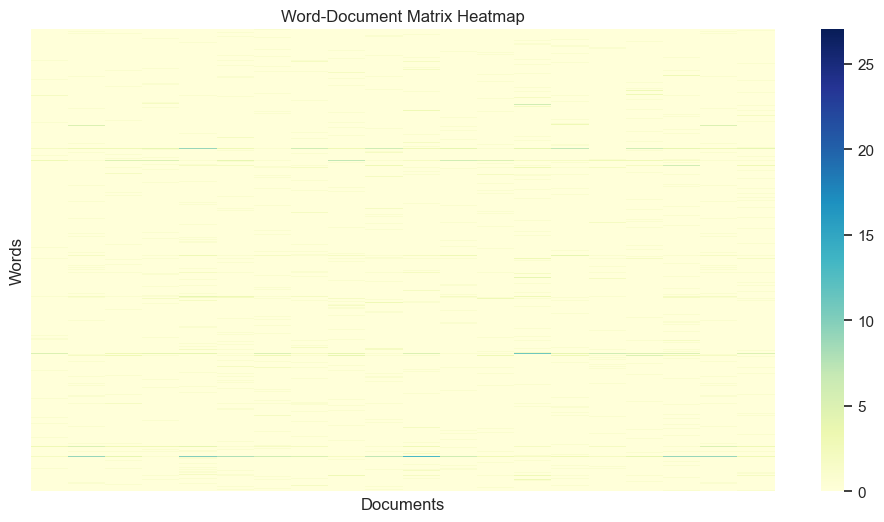

In [68]:
#question 2: Heat map

import matplotlib.pyplot as plt
import seaborn as sns

#heatmap using seaborn
plt.figure(figsize=(12, 6)) 
sns.set(font_scale=1)  


sns.heatmap(A, cmap="YlGnBu", xticklabels=False, yticklabels=False)

plt.title('Word-Document Matrix Heatmap')
plt.xlabel('Documents')
plt.ylabel('Words')

plt.show()

In [69]:
#question 3: TF_IDF matrix

tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(A.T)

#matrix to array
tfidf_matrix = tfidf_matrix.toarray()

# shape of matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Accessing the TF-IDF scores for a specific word in a specific document 
word_index = 12  
doc_index = 11   


tfidf_score = tfidf_matrix[doc_index][word_index]
print(f"TF-IDF Score for Word {word_index} in Document {doc_index}: {tfidf_score}")

TF-IDF Matrix Shape: (20, 1362)
TF-IDF Score for Word 12 in Document 11: 0.0


In [70]:
#question 4

from sklearn.metrics.pairwise import cosine_similarity


# cosine similarity between "10.txt" and all other documents
document_index = 9  

#the TF-IDF vector for "10.txt"
tfidf_vector_10 = tfidf_matrix[:, document_index].reshape(1, -1)

#cosine similarity between "10.txt" and all documents
cosine_similarities = cosine_similarity(tfidf_vector_10, tfidf_matrix.T)


top_similar_indices = np.argsort(cosine_similarities[0])[::-1][1:4]

 #indices and cosine similarity scores of the most similar documents are:
    
for i, doc_index in enumerate(top_similar_indices, 1):
    similarity_score = cosine_similarities[0][doc_index]
    print(f"Similar Document {i}: Document {doc_index} (Cosine Similarity Score: {similarity_score:.4f})")


Similar Document 1: Document 176 (Cosine Similarity Score: 1.0000)
Similar Document 2: Document 25 (Cosine Similarity Score: 1.0000)
Similar Document 3: Document 1119 (Cosine Similarity Score: 1.0000)


In [71]:
# dot product of the word-document matrix with its transpose
B = np.dot(A.T, A)

# highest number of common words with itself
np.fill_diagonal(B, np.max(B))

# the matrix B
print(B)

[[1305   97  132   86  128  112  138  105  136   84  142   80   98  300  112  109  108  137   97  132]
 [  97 1305  157   75  229  167  170  150  118  143  217  114  108  248  139   93  122  193  317  139]
 [ 132  157 1305  103  179  156  191  150  173  130  199  117  149  371  161  136  163  192  157  166]
 [  86   75  103 1305  123   82  100   79  121   68  108   82   90  199  103   83  100  105   75   98]
 [ 128  229  179  123 1305  211  199  211  161  186  261  163  133  318  224  119  185  296  229  195]
 [ 112  167  156   82  211 1305  163  140  144  169  210  135  122  280  138  104  135  217  167  145]
 [ 138  170  191  100  199  163 1305  167  183  136  233  123  164  429  181  162  165  229  170  191]
 [ 105  150  150   79  211  140  167 1305  134  132  193  103  108  319  166  100  138  204  150  161]
 [ 136  118  173  121  161  144  183  134 1305  113  176  122  168  383  195  131  171  184  118  165]
 [  84  143  130   68  186  169  136  132  113 1305  193  111   95  241  